In [3]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
pd.set_option('display.max_columns', None)


"""load data"""
csv_file = 'Desktop/liwc_response_context_train.csv'   
data = pd.read_csv(csv_file)
data = data.drop(['Unnamed: 0','Unnamed: 0.1.1.1','Unnamed: 0.1.1', 'Unnamed: 0.1'],axis = 1) #remove unwanted columns
#drop all categorical (for the time being)
featuresDF= data.copy()

featuresDF['response_emotion'] = featuresDF['response_emotion'].astype('category').cat.codes
featuresDF['context0_emotion'] = featuresDF['context0_emotion'].astype('category').cat.codes
featuresDF['context1_emotion'] = featuresDF['context1_emotion'].astype('category').cat.codes

featuresDF = featuresDF.drop(['tokenized_text','response','context/1','context/0','concat_tweet'], axis =1)

"""Encoding"""
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['label'] = labelencoder.fit_transform(data['label']) #numerically encode labels
labelDF = data['label']
features, labels = featuresDF.values, labelDF.values
headers = list(data.drop("label", axis=1))


feature_array = featuresDF.values
label_array = labelDF.values

X = feature_array
Y = label_array

In [7]:
featuresDF.head(2)  #df with all features extracted

,social,humans,funct,conj,cogmech,incl,verb,auxverb,future,discrep,past,inhib,preps,space,relativ,work,pronoun,ppron,you,affect,negemo,anx,adverb,anger,certain,present,cause,article,ipron,posemo,quant,tentat,excl,motion,insight,shehe,sad,achieve,they,negate,money,percept,see,number,hear,swear,time,filler,leisure,death,i,bio,sexual,health,friend,ingest,assent,we,body,feel,relig,home,family,nonfl,label,response_emotion,context0_emotion,cos_sim,cos_sim1,Emotional_sim_response/context/0,noun_count_percent,adj_count_percent,adv_count_percent,pro_count_percent,char_count,word_density,punctuation_count,upper_case_word_count,vader_pos,vader_neg,vader_neu,vader_compound,context1_emotion,val_diff_c0_resp,aro_diff_c0_resp,dom_diff_c0_resp,val_diff_c1_resp,aro_diff_c1_resp,dom_diff_c1_resp
0,11.0,3.0,34.0,5.0,16.0,6.0,17.0,10.0,3.0,4.0,2.0,1.0,6.0,2.0,3.0,1.0,9.0,7.0,6.0,5.0,2.0,1.0,2.0,1.0,2.0,9.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SARCASM,4,5,0.881,0.880,0.082695,0.250000,0.050000,0.125000,0.112500,5.075000,0.063437,0.250000,0.025000,0.0,0.209,0.791,0.02995,3,0.893167,-0.533667,0.697667,-0.597500,0.015000,0.331667
1,8.0,0.0,22.0,2.0,6.0,2.0,6.0,4.0,0.0,0.0,1.0,0.0,6.0,2.0,2.0,0.0,7.0,6.0,1.0,2.0,2.0,0.0,3.0,1.0,0.0,4.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SARCASM,0,5,0.775,0.853,0.016047,0.244444,0.022222,0.066667,0.155556,4.933333,0.109630,0.111111,0.022222,0.0,0.227,0.773,0.05840,5,0.675000,0.028333,0.718333,-0.291667,-0.088333,0.416667


In [4]:
"""Univariate"""

"""
Statistical tests can be used to select those features that have the strongest
relationship with the output variable. The scikit-learn library provides the 
SelectKBest class that can be used with a suite of different statistical tests 
to select a specific number of features.
"""

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# UNIVARIATE FEATURE SELECTION
# drop target columns
drop_cols=['label']
X = featuresDF.drop(drop_cols, axis = 1) # X = independent columns (potential predictors)
y = featuresDF['label'] # y = target column (what we want to predict)
# instantiate SelectKBest to determine 20 best features
best_features = SelectKBest(score_func=f_classif, k=20)
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(20,'Score'))  # print 20 best features
# export selected features to .csv
df_univ_feat = feature_scores.nlargest(20,'Score')
df_univ_feat.to_csv('feature_selection_UNIVARIATE.csv', index=False)


        Feature_Name       Score
74      word_density  391.920382
78         vader_neg  367.292819
80    vader_compound  355.831698
29            posemo  327.252184
77         vader_pos  289.210090
17             ppron  218.759883
2              funct  200.152241
14           relativ  199.129654
5               incl  184.739635
46              time  175.764316
64  response_emotion  171.648216
50                 i  167.864359
12             preps  158.028553
16           pronoun  156.196565
66           cos_sim  144.105467
73        char_count  140.371629
81  context1_emotion  138.731348
19            affect  134.824329
51               bio  131.135331
67          cos_sim1  127.490177


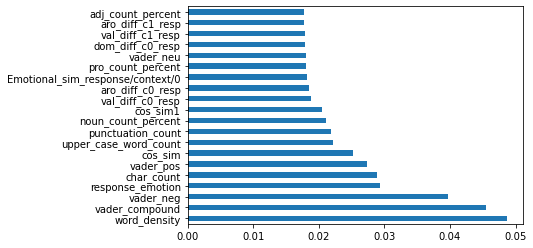

word_density                        0.048639
vader_compound                      0.045424
vader_neg                           0.039745
response_emotion                    0.029277
char_count                          0.028868
vader_pos                           0.027290
cos_sim                             0.025125
upper_case_word_count               0.022140
punctuation_count                   0.021890
noun_count_percent                  0.021089
cos_sim1                            0.020461
val_diff_c0_resp                    0.018719
aro_diff_c0_resp                    0.018543
Emotional_sim_response/context/0    0.018169
pro_count_percent                   0.018005
vader_neu                           0.017979
dom_diff_c0_resp                    0.017917
val_diff_c1_resp                    0.017860
aro_diff_c1_resp                    0.017759
adj_count_percent                   0.017731
dtype: float64


In [5]:

"""Feature Importance"""


"""
You can get the feature importance of each feature of your dataset by
using the feature importance property of the model. Feature importance 
gives you a score for each feature of your data, the higher the score more 
important or relevant is the feature towards your output variable. Feature 
importance is an inbuilt class that comes with Tree Based Classifiers, 
we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.
"""


# Feature importance is inbuilt with Tree Based Classifiers
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt

# FEATURE IMPORTANCE FEATURE SELECTION
import numpy as np
np.random.seed(42)
# drop target columns

# instantiate RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X,Y)
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
# determine 20 most important features
df_imp_feat = feat_importances.nlargest(20)
# print(rf_model.feature_importances_)
# export selected features to .csv
# df_imp_feat.to_csv('feature_selection_IMPORTANCE.csv', index=False)
df_imp_feat.to_csv('feature_selection_IMPORTANCE.csv')
# plot 20 most important features
# feat_importances.nlargest(20).plot(kind='barh')
df_imp_feat.plot(kind='barh')
plt.show()
print(df_imp_feat)

